In [1]:
import CNN1
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
import pickle
from keras.callbacks import History 
from keras.models import model_from_json
%matplotlib inline

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GT 755M (CNMeM is enabled with initial size: 50.0% of memory, cuDNN 5110)
Using Theano backend.


In [2]:
input_dim = 21

model = model_from_json(open('my_model_architecture.json').read()) 
X_train, y_train, num_proteins = CNN1.ReadData.load('training.data')
X_test , y_test, num_testproteins = CNN1.ReadData.load('validation.data')

model.compile(loss='categorical_crossentropy',optimizer='rmsprop')
model.load_weights('CNN1D_model_weights.hdf5')

... loading data ("training.data")
(10000L,)
... loading data ("validation.data")
(5000L,)


In [3]:
fit_pickle = 'CNN1D_fit_results.pkl'
fit_results = pickle.load(open(fit_pickle))

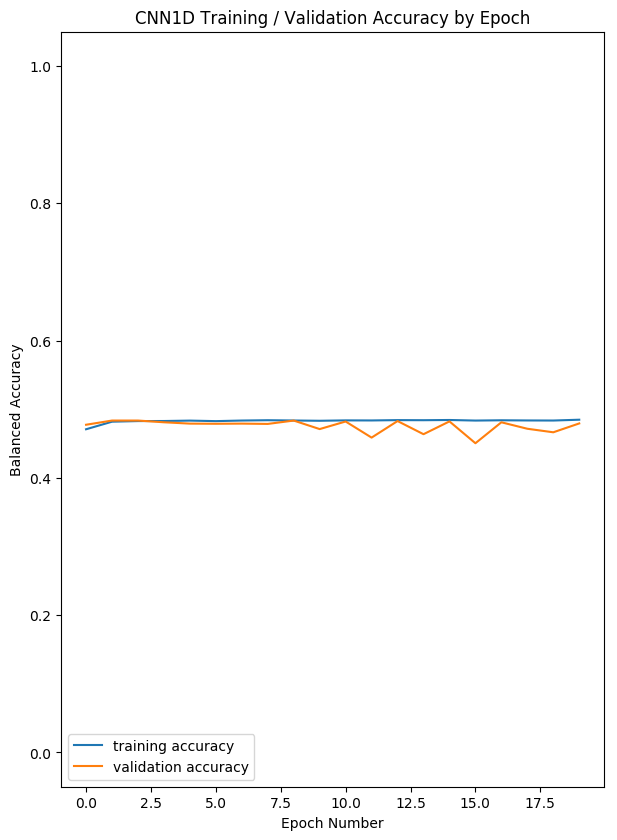

In [4]:
tr_acc = fit_results.history['acc']
val_acc = fit_results.history['val_acc']
epoch_nums = range(len(tr_acc))

plt.figure(figsize=(7, 10), dpi=100)
plt.plot(epoch_nums, tr_acc, label='training accuracy')
plt.plot(epoch_nums, val_acc, label='validation accuracy')
plt.ylim([-0.05, 1.05])
plt.xlabel('Epoch Number')
plt.ylabel('Balanced Accuracy')
plt.title('CNN1D Training / Validation Accuracy by Epoch')
plt.legend(loc="lower left")
plt.savefig('figures/CNN1DOneHot_train_val_acc.png')
plt.show()

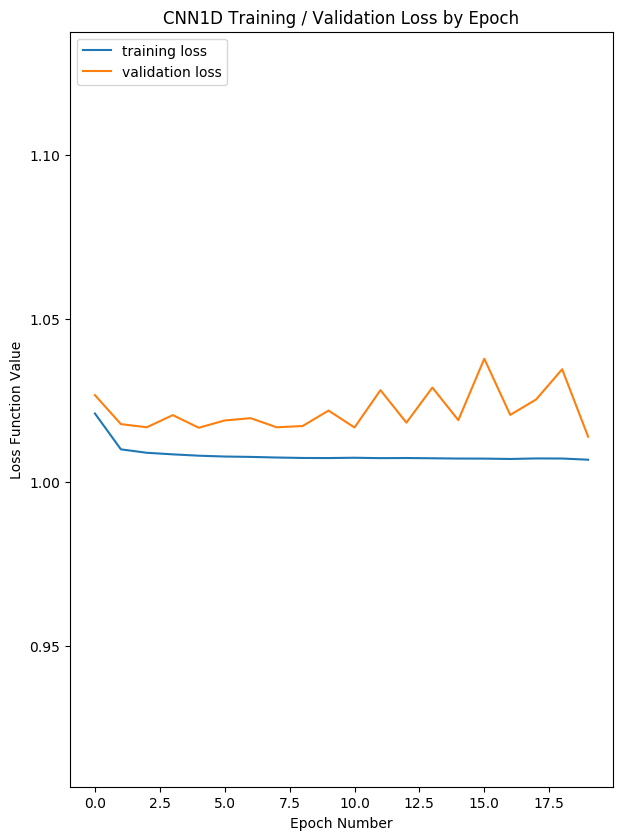

In [5]:
tr_loss = fit_results.history['loss']
val_loss = fit_results.history['val_loss']


y_ax_min = np.minimum(np.min(tr_loss), np.min(val_loss)) - .1
y_ax_max = np.maximum(np.max(tr_loss), np.max(val_loss)) + .1
plt.figure(figsize=(7, 10), dpi=100)
plt.plot(epoch_nums, tr_loss, label='training loss')
plt.plot(epoch_nums, val_loss, label='validation loss')
plt.ylim([y_ax_min, y_ax_max])
plt.xlabel('Epoch Number')
plt.ylabel('Loss Function Value')
plt.title('CNN1D Training / Validation Loss by Epoch')
plt.legend(loc="upper left")
plt.savefig('figures/CNN1DOneHot_train_val_loss.png')
plt.show()

In [7]:
def get_Xbatch(data_in):
    lengths = list(set(map(len, data_in)))
    data_by_length = {}
    for i, l in enumerate(map(len, data_in)):
        if l not in data_by_length:
            data_by_length[l] = []
        data_by_length[l].append(i)

    while True: # a new epoch
        np.random.shuffle(lengths)
        for length in lengths:
            indexes = data_by_length[length]
            np.random.shuffle(indexes)
            input_data = np.array([data_in[i] for i in indexes])
            yield (input_data)
y_predict = model.predict_generator(get_Xbatch(X_test),num_testproteins)

ValueError: could not broadcast input array from shape (17,167,3) into shape (17,102,3)